Import necessary modules

In [29]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input,Dense,GaussianNoise,Reshape
import tensorflow_datasets as tfds


tf.keras.backend.set_floatx('float64')


Load and preprocess data
Gaussian noise is added to a copy of test data

In [43]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
print(x_train.shape)
x_trainarray=np.array(x_train)
y_trainarray=np.array(y_train)
index1=np.where(y_train==1)
y_train2=np.delete(y_trainarray,index1)
x_train2=np.delete(x_trainarray,index1,axis=0)
x_train2 = x_train2.reshape((len(x_train2), np.prod(x_train2.shape[1:])))

print(x_train2.shape)
print(y_train2.shape)
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
x_noise=x_test.copy()
noise = np.random.normal(0, 1, x_noise.shape)
x_noise=x_noise+0.7*noise
# convert class vectors to binary class matrices

# yt_lab=y_test



(60000, 28, 28)
(53258, 784)
(53258,)


Create a "close-to-complete" autoencoder named modelNf - should learn as function close to identity (on training data) and hence keeps the noise

In [4]:
input=Input(shape=(x_train.shape[1])) 

x=Dense(512,activation="relu")(input)
x=Dense(512,activation="relu")(x)
x=Dense(512,activation="relu")(x)
x=Dense(512,activation="relu")(x)
x=Dense(512,activation="relu")(x)
out=Dense(x_train.shape[1], activation='linear')(x)
modelNf=Model(input,out)
modelNf.compile(loss='mse', optimizer="adam")
print(modelNf.summary())

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 512)               401920    
_________________________________________________________________
dense_1 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_4 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_5 (Dense)              (None, 784)               402192

Create a denoising autoencoder named model - the input data are corrupted by added noise and the model is trained to reconstruct the uncorrupted data

In [5]:
input=Input(shape=(x_train.shape[1])) 
x=GaussianNoise(0.8)(input)
x=Dense(64,activation="relu")(x)
x=Dense(32,activation="relu")(x)
x=Dense(32,activation="relu")(x)
x=Dense(64,activation="relu")(x)
out=Dense(x_train.shape[1], activation='linear')(x)
model=Model(input,out)
model.compile(loss='mse', optimizer="adam")
print(model.summary())


Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
gaussian_noise (GaussianNois (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 64)                50240     
_________________________________________________________________
dense_7 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_8 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_9 (Dense)              (None, 64)                2112      
_________________________________________________________________
dense_10 (Dense)             (None, 784)               5096

An undercomplete autoencoder named modelB - the model is trained to represent the highdimensional data in 2D. Such model should have some denoising properties since it extracts important features only. On the othe hand the representation space might not be rich enough.

In [6]:
input=Input(shape=(x_train.shape[1])) 
#x=GaussianNoise(0.8)(input)
x=Dense(64,activation="relu")(input)
embed=Dense(2,activation="relu")(x)
x=Dense(32,activation="relu")(embed)
x=Dense(64,activation="relu")(x)
out=Dense(x_train.shape[1], activation='linear')(x)
modelB=Model(input,out)
modelB.compile(loss='mse', optimizer="adam")
print(modelB.summary())
embedding=Model(input,embed)

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense_11 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_12 (Dense)             (None, 2)                 130       
_________________________________________________________________
dense_13 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_14 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_15 (Dense)             (None, 784)               50960     
Total params: 103,538
Trainable params: 103,538
Non-trainable params: 0
_____________________________________________________

In [45]:
model.fit(x_train, x_train, batch_size=512, epochs=20, validation_split=0.2)



Epoch 1/20
94/94 [==============================] - 5s 51ms/step - loss: 0.0366 - val_loss: 0.0314
Epoch 2/20
94/94 [==============================] - 5s 50ms/step - loss: 0.0360 - val_loss: 0.0310
Epoch 3/20
94/94 [==============================] - 5s 52ms/step - loss: 0.0357 - val_loss: 0.0307
Epoch 4/20
94/94 [==============================] - 5s 52ms/step - loss: 0.0354 - val_loss: 0.0304
Epoch 5/20
94/94 [==============================] - 5s 51ms/step - loss: 0.0350 - val_loss: 0.0299
Epoch 6/20
94/94 [==============================] - 5s 51ms/step - loss: 0.0347 - val_loss: 0.0295
Epoch 7/20
94/94 [==============================] - 5s 51ms/step - loss: 0.0344 - val_loss: 0.0292
Epoch 8/20
94/94 [==============================] - 5s 50ms/step - loss: 0.0341 - val_loss: 0.0289
Epoch 9/20
94/94 [==============================] - 5s 50ms/step - loss: 0.0338 - val_loss: 0.0286
Epoch 10/20
94/94 [==============================] - 5s 49ms/step - loss: 0.0336 - val_loss: 0.0283
Epoch 11/

In [ ]:
modelB.fit(x_train, x_train, batch_size=512, epochs=20, validation_split=0.2)


Epoch 1/20
94/94 [==============================] - 3s 23ms/step - loss: 0.0850 - val_loss: 0.0633
Epoch 2/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0626 - val_loss: 0.0575
Epoch 3/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0567 - val_loss: 0.0547
Epoch 4/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0543 - val_loss: 0.0535
Epoch 5/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0533 - val_loss: 0.0526
Epoch 6/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0525 - val_loss: 0.0517
Epoch 7/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0516 - val_loss: 0.0510
Epoch 8/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0509 - val_loss: 0.0501
Epoch 9/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0499 - val_loss: 0.0494
Epoch 10/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0493 - val_loss: 0.0491
Epoch 11/

In [44]:

h = modelNf.fit(x_train2, x_train2, batch_size=512, epochs=20, validation_split=0.2)
h.history

Epoch 1/20
84/84 [==============================] - 21s 251ms/step - loss: 0.0082 - val_loss: 0.0065
Epoch 2/20
84/84 [==============================] - 21s 248ms/step - loss: 0.0079 - val_loss: 0.0064
Epoch 3/20
84/84 [==============================] - 21s 249ms/step - loss: 0.0068 - val_loss: 0.0053
Epoch 4/20
84/84 [==============================] - 21s 250ms/step - loss: 0.0086 - val_loss: 0.0072
Epoch 5/20
84/84 [==============================] - 21s 249ms/step - loss: 0.0070 - val_loss: 0.0060
Epoch 6/20
84/84 [==============================] - 21s 250ms/step - loss: 0.0072 - val_loss: 0.0063
Epoch 7/20
84/84 [==============================] - 21s 247ms/step - loss: 0.0065 - val_loss: 0.0050
Epoch 8/20
84/84 [==============================] - 21s 247ms/step - loss: 0.0066 - val_loss: 0.0061
Epoch 9/20
84/84 [==============================] - 21s 247ms/step - loss: 0.0071 - val_loss: 0.0068
Epoch 10/20
84/84 [==============================] - 21s 249ms/step - loss: 0.0065 - val_lo

{'loss': [0.008153399689299567,
  0.007943786290647228,
  0.006824029134412894,
  0.008556199381635519,
  0.00699165655159337,
  0.007176593247115918,
  0.006544887649074364,
  0.006570234588683435,
  0.007089158243105842,
  0.006533747658711283,
  0.006805922504880288,
  0.006425244179238859,
  0.007074199174658679,
  0.006333014978276793,
  0.005907901910679303,
  0.006194569532284405,
  0.0056853505355615366,
  0.0054548896715553505,
  0.006847193795340911,
  0.005544264032766667],
 'val_loss': [0.006527211127849593,
  0.006428174374270464,
  0.005283977081135358,
  0.0071520772944454565,
  0.005987776831908755,
  0.006292077825851305,
  0.005014815074862046,
  0.006144899283887254,
  0.006779574858702487,
  0.007593075232632763,
  0.004816891643184773,
  0.004852017002873377,
  0.0057911616604924875,
  0.005295853463284478,
  0.005513175313196268,
  0.005308058958149498,
  0.00596418977885392,
  0.018769330811979536,
  0.005822658163911187,
  0.0071932737198995775]}

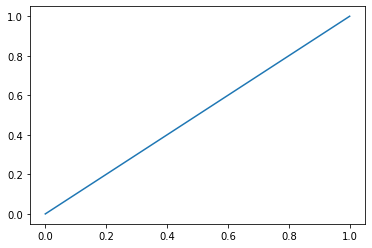

In [48]:
import matplotlib.pyplot as plt
hist = h.history
plt.plot([j for j in range(len(hist))])

Results of applying of the modelNf on corrupted data - the noise is kept

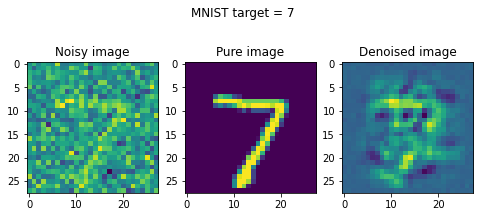

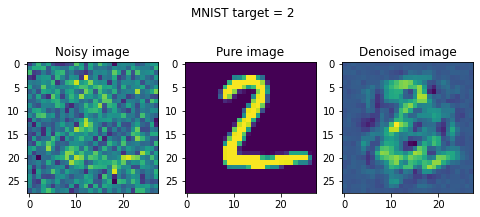

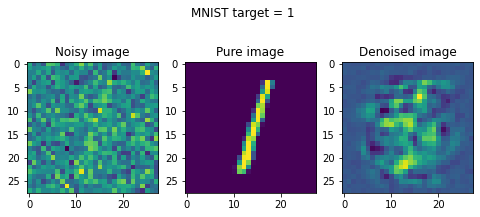

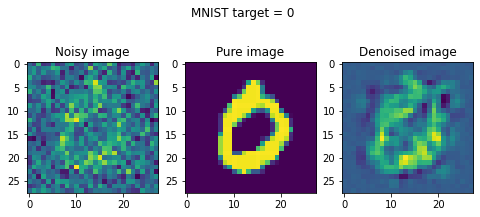

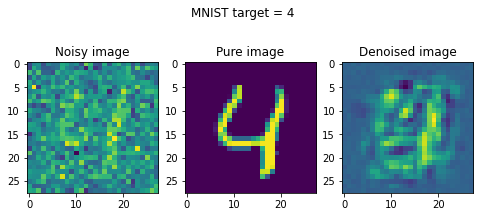

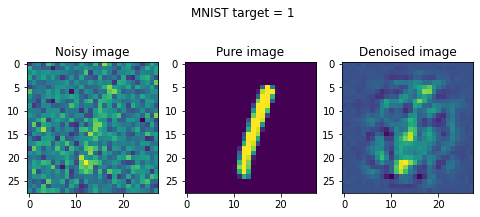

In [52]:
import matplotlib.pyplot as plt
number_of_visualizations=6
samples = x_noise[:number_of_visualizations]
targets = y_test[:number_of_visualizations]
denoised_images = modelNf.predict(samples)

# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = x_noise[i]
  pure_image  = x_test[i]
  denoised_image = denoised_images[i]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image.reshape(28, 28))
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image.reshape(28, 28))
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image.reshape(28, 28))
  axes[2].set_title('Denoised image')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()

Application of a denoising autoencoder named model

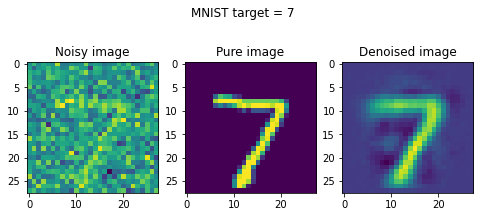

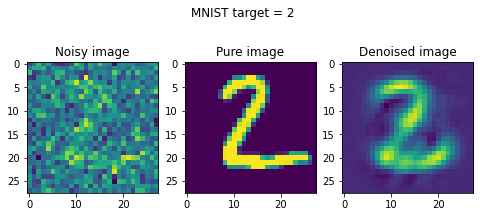

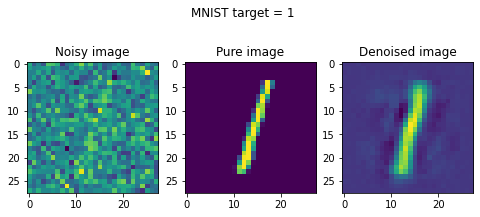

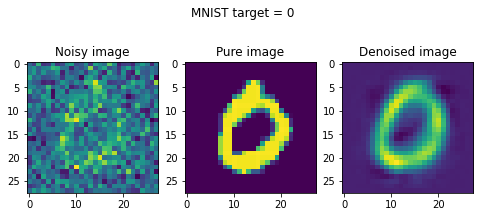

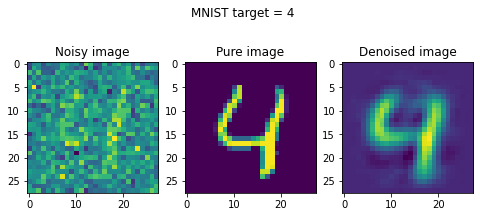

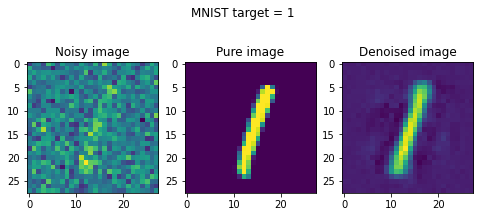

In [53]:
import matplotlib.pyplot as plt
number_of_visualizations=6
samples = x_noise[:number_of_visualizations]
targets = y_test[:number_of_visualizations]
denoised_images = model.predict(samples)

# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = x_noise[i]
  pure_image  = x_test[i]
  denoised_image = denoised_images[i]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image.reshape(28, 28))
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image.reshape(28, 28))
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image.reshape(28, 28))
  axes[2].set_title('Denoised image')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()

Application of an undercomplete autoencoder named modelB - this model has denoising properties but fails to capture all nuances of the data

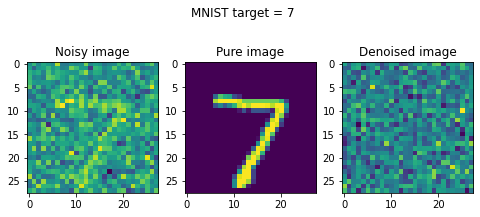

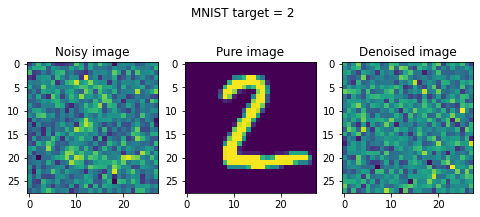

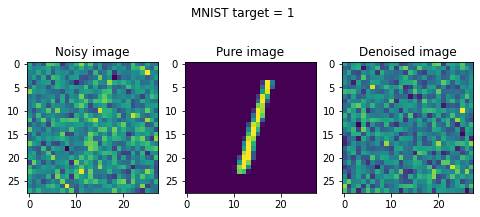

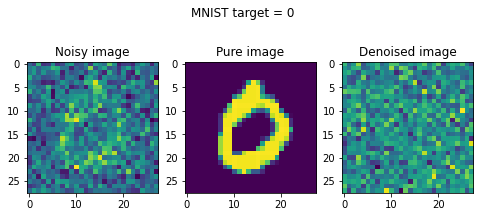

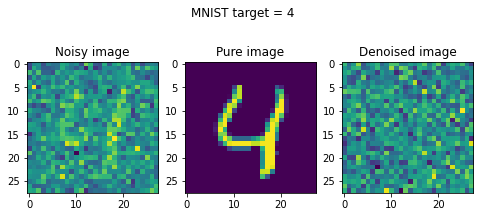

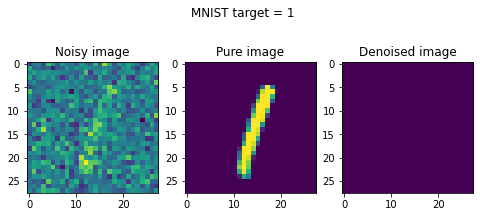

In [54]:
import matplotlib.pyplot as plt
number_of_visualizations=6
samples = x_noise[:number_of_visualizations]
targets = y_test[:number_of_visualizations]
denoised_images = modelB.predict(samples)

# Plot denoised images
for i in range(0, number_of_visualizations):
  # Get the sample and the reconstruction
  noisy_image = x_noise[i]
  pure_image  = x_test[i]
  denoised_image = denoised_images[i]
  input_class = targets[i]
  # Matplotlib preparations
  fig, axes = plt.subplots(1, 3)
  fig.set_size_inches(8, 3.5)
  # Plot sample and reconstruciton
  axes[0].imshow(noisy_image.reshape(28, 28))
  axes[0].set_title('Noisy image')
  axes[1].imshow(pure_image.reshape(28, 28))
  axes[1].set_title('Pure image')
  axes[2].imshow(denoised_image.reshape(28, 28))
  axes[2].set_title('Denoised image')
  fig.suptitle(f'MNIST target = {input_class}')
  plt.show()

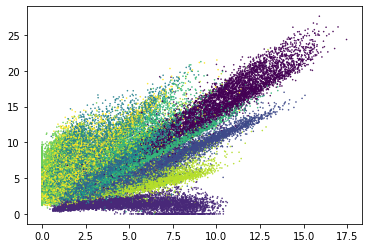

In [ ]:
import matplotlib.pyplot as plt

yt=embedding(x_train)
plt.scatter(yt[:,0],yt[:,1], c=y_train,s=0.3)

In [ ]:
D1=Dense(32,activation="relu")
D2=Dense(64,activation="relu")
D3=Dense(x_train.shape[1], activation='linear')

input=Input(shape=(x_train.shape[1])) 
#x=GaussianNoise(0.8)(input)
x=Dense(64,activation="relu")(input)
embed=Dense(2,activation="linear")(x)
x=D1(embed)
x=D2(x)
out=D3(x)
modelB=Model(input,out)
modelB.compile(loss='mse', optimizer="adam")
print(modelB.summary())


recoder_input = Input(2)
outR=Reshape((28,28))(D3(D2(D1(recoder_input))))
reconstruct=Model(recoder_input,outR)

Model: "model_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_18 (InputLayer)        [(None, 784)]             0         
_________________________________________________________________
dense_75 (Dense)             (None, 64)                50240     
_________________________________________________________________
dense_76 (Dense)             (None, 2)                 130       
_________________________________________________________________
dense_72 (Dense)             (None, 32)                96        
_________________________________________________________________
dense_73 (Dense)             (None, 64)                2112      
_________________________________________________________________
dense_74 (Dense)             (None, 784)               50960     
Total params: 103,538
Trainable params: 103,538
Non-trainable params: 0
____________________________________________________

In [ ]:
modelB.fit(x_train, x_train, batch_size=512, epochs=20, validation_split=0.2)


Epoch 1/20
94/94 [==============================] - 2s 22ms/step - loss: 0.0809 - val_loss: 0.0582
Epoch 2/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0575 - val_loss: 0.0558
Epoch 3/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0554 - val_loss: 0.0534
Epoch 4/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0533 - val_loss: 0.0521
Epoch 5/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0519 - val_loss: 0.0507
Epoch 6/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0506 - val_loss: 0.0494
Epoch 7/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0490 - val_loss: 0.0485
Epoch 8/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0482 - val_loss: 0.0479
Epoch 9/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0477 - val_loss: 0.0475
Epoch 10/20
94/94 [==============================] - 2s 21ms/step - loss: 0.0472 - val_loss: 0.0471
Epoch 11/

In [ ]:
COLUMNS = 15*2 + 1
ROWS = 15 * 2 + 1

column_offset = COLUMNS//2
row_offset = ROWS//2
graph = np.zeros((COLUMNS*ROWS, 28, 28))

def generate_graph(target, model):
  # Fill out given target with results from model
  for i in range(ROWS):
    for j in range(COLUMNS):
      tensor = tf.constant((i-row_offset, j-column_offset), dtype="float64")
      target[i*COLUMNS + j] = model(np.array((tensor,)))

def show_graph(data):
  # Show graph from given from
  fig = plt.figure(figsize=(15.,15.))
  for i in range(1, COLUMNS*ROWS + 1):
      img = data[i-1]
      fig.add_subplot(ROWS, COLUMNS, i)
      plt.imshow(img, cmap=plt.cm.binary)
      plt.axis("off")
  plt.savefig('foo.png', bbox_inches='tight')
  plt.show()

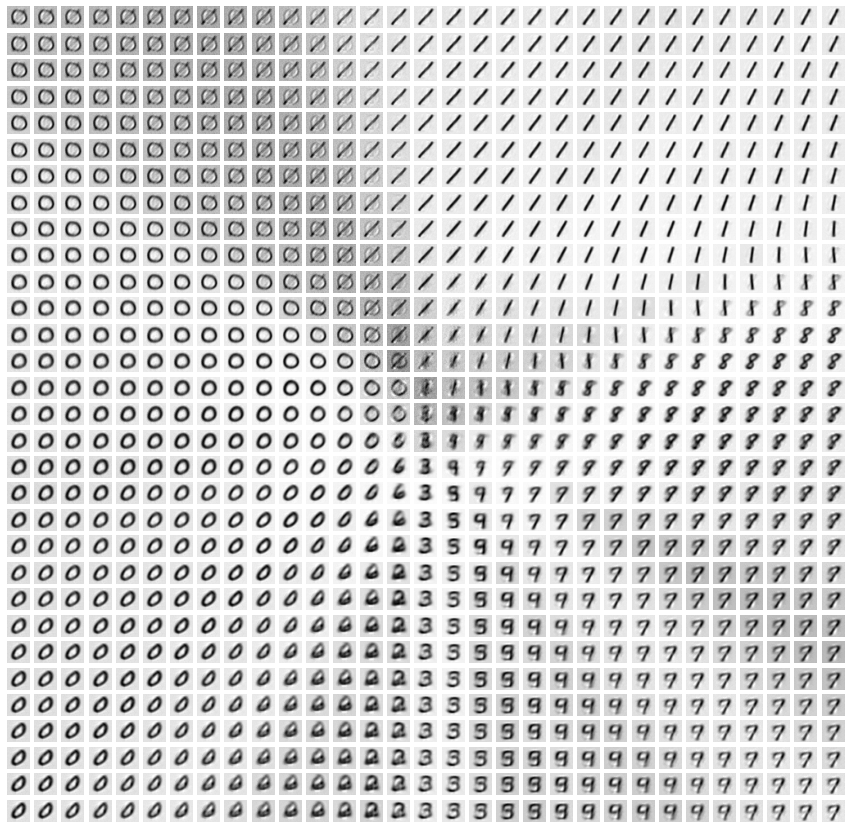

In [ ]:
generate_graph(graph, reconstruct)
show_graph(graph)